In [3]:
# import libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import os
import numpy as np

In [44]:
df = pd.read_csv('Edison_random_sample.csv')

In [45]:
df

,Id,Finmo Submit Date,JumpstartFlag,IsFirstTimeBuyer__c,LoanAmount__c,Loan Amount (50k Bins),LoanPurpose__c,PropertyCity__c,PropertyPostalCode__c,PropertyProvince__c,...,PAL FirstStatusDate,Presentation FirstStatusDate,ApplicationStarted FirstStatusDate,SubmitToLender FirstStatusDate,Lead_Allocate_DD,Allocate_Credit_DD,Credit_PAL_DD,PAL_Present_DD,Present_App_DD,App_Submit_DD
0,1,-1,0,False,452500.0,350000.0,1,951,7528,6,...,-1,-1,1,1,1.0,1.0,-1.0,-1.0,-1.0,0.0
1,61,-1,0,False,420000.0,400000.0,1,944,7528,6,...,-1,-1,1,1,73.0,0.0,-1.0,-1.0,-1.0,0.0
2,89,-1,0,False,170000.0,150000.0,2,941,7528,6,...,-1,-1,1,1,0.0,0.0,-1.0,-1.0,-1.0,14.0
3,98,-1,0,False,900000.0,1050000.0,2,941,7528,10,...,-1,-1,1,1,1.0,0.0,-1.0,-1.0,-1.0,21.0
4,103,-1,0,False,610000.0,600000.0,1,941,7528,10,...,-1,-1,1,1,3.0,0.0,-1.0,-1.0,-1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,39354,-1,0,False,405000.0,400000.0,1,954,7528,6,...,-1,-1,-1,-1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3836,3204,-1,0,False,170000.0,150000.0,0,671,5409,0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3837,27199,-1,0,False,800000.0,800000.0,0,954,7528,6,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3838,26177,-1,0,True,1560000.0,1550000.0,0,954,7528,6,...,-1,-1,-1,-1,2.0,0.0,-1.0,-1.0,-1.0,-1.0


In [46]:
feature_cols = ['Finmo Submit Date', 'JumpstartFlag', 'IsFirstTimeBuyer__c',
       'LoanAmount__c', 'Loan Amount (50k Bins)', 'LoanPurpose__c',
       'PropertyCity__c', 'PropertyPostalCode__c', 'PropertyProvince__c',
       'PurchasePrice__c', 'PurchaseTimeframe__c',
       'SelfAssessedCreditRating__c', 'Source', '# of dials to allocate',
       'LeadDate', 'AllocateDate', 'Credit FirstStatusDate',
       'PAL FirstStatusDate', 'Presentation FirstStatusDate',
       'ApplicationStarted FirstStatusDate',
       'Lead_Allocate_DD', 'Allocate_Credit_DD', 'Credit_PAL_DD',
       'PAL_Present_DD', 'Present_App_DD', 'App_Submit_DD']
x=df[feature_cols]
y=df['SubmitToLender FirstStatusDate']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9205729166666666


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[334  30]
 [ 31 373]]
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       364
           1       0.93      0.92      0.92       404

    accuracy                           0.92       768
   macro avg       0.92      0.92      0.92       768
weighted avg       0.92      0.92      0.92       768



C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


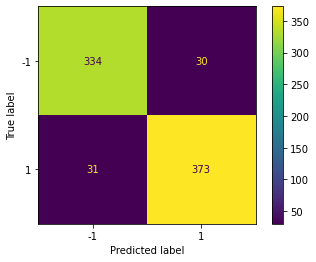

In [51]:
plot_confusion_matrix(clf,x_test,y_test)

In [52]:
# K-nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))

train shape: (3072, 26)


In [53]:
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

score on test: 0.7434895833333334
score on train: 0.8323567708333334


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


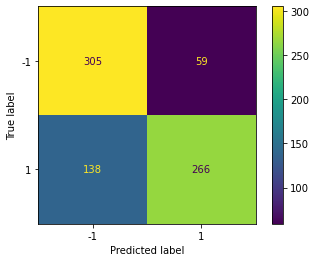

In [54]:
plot_confusion_matrix(knn,x_test,y_test)

In [55]:
# Support Vector Machine
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.59375
score on train: 0.5693359375


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


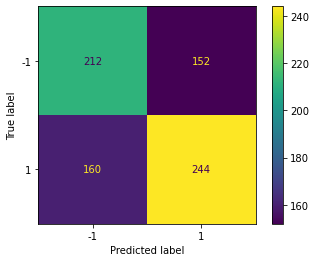

In [56]:
plot_confusion_matrix(svm,x_test,y_test)

In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clff = DecisionTreeClassifier()
clff.fit(x_train, y_train)
print("score on test: "  + str(clff.score(x_test, y_test)))
print("score on train: " + str(clff.score(x_train, y_train)))

score on test: 0.9166666666666666
score on train: 1.0


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


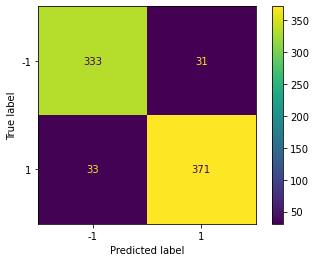

In [58]:
plot_confusion_matrix(clff,x_test,y_test)

In [59]:
#Bagging Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)
print("score on test: " + str(bg.score(x_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

score on test: 0.9114583333333334
score on train: 0.9749348958333334


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


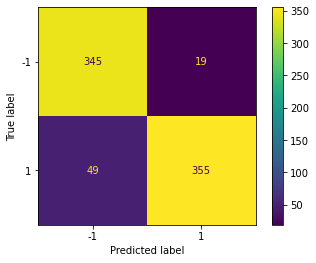

In [60]:
plot_confusion_matrix(bg,x_test,y_test)

In [61]:
# Boosting Decision Tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train, y_train)
print("score on test: " + str(adb.score(x_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

score on test: 0.9231770833333334
score on train: 0.97265625


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


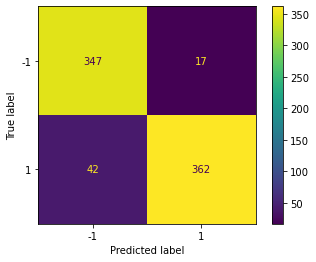

In [62]:
plot_confusion_matrix(adb,x_test,y_test)

In [63]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.91796875
score on train: 0.9697265625


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


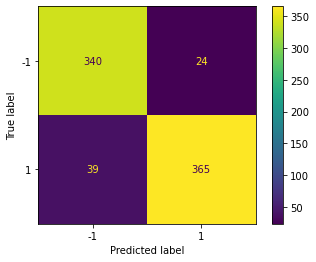

In [64]:
plot_confusion_matrix(rf,x_test,y_test)

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.4427083333333333
score on train: 0.4527994791666667


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


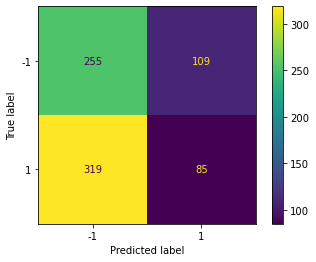

In [66]:
plot_confusion_matrix(lr,x_test,y_test)

In [68]:
# voting classifier

from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

score on test: 0.8385416666666666
score on train: 0.87890625


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


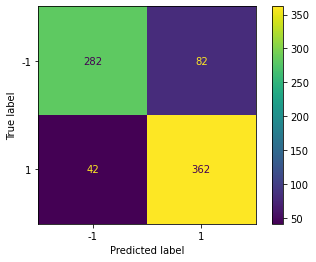

In [69]:
plot_confusion_matrix(evc,x_test,y_test)